In [ ]:
import pandas as pd

# Load dataset
file_path = "dummy_criminal_risk_dataset.csv"  # Update with the actual path
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())


   Case_ID  Prior_Convictions       Bail_History     Charge_Type  Age  \
0        1                  6  No Bail Violation     Misdemeanor   39   
1        2                  3    Minor Violation          Felony   42   
2        3                  7  No Bail Violation  Serious Felony   30   
3        4                  4  No Bail Violation  Serious Felony   35   
4        5                  6    Minor Violation     Misdemeanor   50   

  Employment_Status  Risk_Category  
0        Unemployed              2  
1          Employed              1  
2        Unemployed              3  
3        Unemployed              1  
4        Unemployed              1  


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
categorical_columns = ["Bail_History", "Charge_Type", "Employment_Status"]

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Define features (X) and target variable (y)
X = df.drop(columns=["Case_ID", "Risk_Category"])  # Drop non-relevant columns
y = df["Risk_Category"]-1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Define model architecture
model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],), kernel_regularizer=keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),  # Helps prevent overfitting
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(3, activation="softmax")  # Output layer (3 classes: Low, Medium, High)
])

# Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4026 - loss: 7.1126 - val_accuracy: 0.2900 - val_loss: 3.6583
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3244 - loss: 4.3780 - val_accuracy: 0.3000 - val_loss: 1.2833
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3794 - loss: 2.5562 - val_accuracy: 0.3200 - val_loss: 1.2789
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3247 - loss: 2.2621 - val_accuracy: 0.3700 - val_loss: 1.3736
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3932 - loss: 1.7620 - val_accuracy: 0.3500 - val_loss: 1.3890
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2877 - loss: 1.7708 - val_accuracy: 0.3500 - val_loss: 1.3002
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3522 - loss: 1.5884 - val_accuracy: 0.3500 - val_loss: 1.2205
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3144 - loss: 1.3746 - val_accuracy: 0.3500 - val_loss: 1.

In [ ]:
# Evaluate performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3292 - loss: 1.1115
Test Accuracy: 0.31


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Train logistic regression
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=500)
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Classification Report
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.31
              precision    recall  f1-score   support

           0       0.42      0.31      0.36        35
           1       0.25      0.48      0.33        31
           2       0.38      0.15      0.21        34

    accuracy                           0.31       100
   macro avg       0.35      0.32      0.30       100
weighted avg       0.36      0.31      0.30       100



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display classification report
print(classification_report(y_test, y_pred))


Model Accuracy: 0.38
              precision    recall  f1-score   support

           1       0.42      0.49      0.45        35
           2       0.27      0.26      0.26        31
           3       0.43      0.38      0.41        34

    accuracy                           0.38       100
   macro avg       0.38      0.38      0.37       100
weighted avg       0.38      0.38      0.38       100



In [ ]:
new_case = pd.DataFrame({
    "Prior_Convictions": [3],
    "Bail_History": [label_encoders["Bail_History"].transform(["Minor Violation"])[0]],
    "Charge_Type": [label_encoders["Charge_Type"].transform(["Felony"])[0]],
    "Age": [35],
    "Employment_Status": [label_encoders["Employment_Status"].transform(["Employed"])[0]],
})

predicted_risk = clf.predict(new_case)
print(f"Predicted Risk Category: {predicted_risk[0]}")


Predicted Risk Category: 1


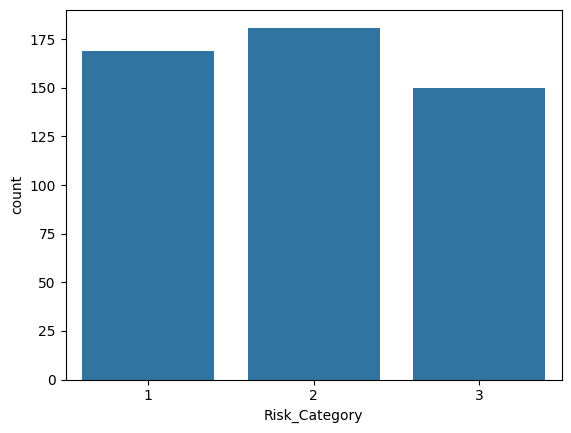

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
sns.countplot(x=df["Risk_Category"])
plt.show()

# If one category is significantly lower, we need resampling


In [ ]:
from xgboost import XGBClassifier
target_encoder = LabelEncoder()

# Fit and transform the target variable
y_train = target_encoder.fit_transform(y_train)
y_test = target_encoder.transform(y_test)  # Use the same encoder for consistency

# Now you can fit the XGBoost model:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:50:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.31


In [ ]:
import pandas as pd

# Load the dataset
file_path = "FTO_data  with class.xlsx"
xls = pd.ExcelFile(file_path)

# Check sheet names
xls.sheet_names


['Sheet1']

In [ ]:
# Load the sheet into a DataFrame
df = pd.read_excel(xls, sheet_name="Sheet1")

# Display the first few rows
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Sl. No,Marital Status,Qualification,Occupation,Personality Factors,Q1,Q2,Q3,Q4,Q5,...,Sex_voilnc,Emtn_voilnc,Sprit_voilnc,ASPD,Voilnet_Att,Willingness_mainstream,lonliness_depression,participation_games,current_psy_condtn,Impression of Risk for REOFFEND
1,1,1,0,0,0,0,0,0,0,2,...,0,0,0,1,1,0,1,0,0,Low
2,2,1,0,1,0,1,1,1,0,2,...,0,0,0,1,1,0,1,1,0,Low
3,3,1,0,1,0,1,0,0,2,2,...,0,0,0,1,1,0,1,1,1,Low
4,4,1,0,1,0,1,0,0,0,2,...,1,0,0,1,1,0,1,0,0,Low


In [ ]:
# Set the first row as column names and remove it from the data
df.columns = df.iloc[0]  # First row as column names
df = df[1:].reset_index(drop=True)  # Remove the first row and reset index

# Rename the target column for clarity
df = df.rename(columns={"Impression of Risk for REOFFEND": "Risk_Category"})

# Display cleaned column names and first few rows
df.head()


,Sl. No,Marital Status,Qualification,Occupation,Personality Factors,Q1,Q2,Q3,Q4,Q5,...,Sex_voilnc,Emtn_voilnc,Sprit_voilnc,ASPD,Voilnet_Att,Willingness_mainstream,lonliness_depression,participation_games,current_psy_condtn,Risk_Category
0,1,1,0,0,0,0,0,0,0,2,...,0,0,0,1,1,0,1,0,0,Low
1,2,1,0,1,0,1,1,1,0,2,...,0,0,0,1,1,0,1,1,0,Low
2,3,1,0,1,0,1,0,0,2,2,...,0,0,0,1,1,0,1,1,1,Low
3,4,1,0,1,0,1,0,0,0,2,...,1,0,0,1,1,0,1,0,0,Low
4,5,1,0,0,0,1,0,1,0,1,...,0,0,0,1,1,1,1,1,1,Low


In [ ]:
# Drop the unnecessary column 'Sl. No'
df = df.drop(columns=["Sl. No"])

# Encode the target variable
risk_mapping = {"Low": 1, "Medium": 2, "High": 3}
df["Risk_Category"] = df["Risk_Category"].map(risk_mapping)

# Convert all columns to numeric types
df = df.apply(pd.to_numeric, errors="coerce")

# Check for missing values
missing_values = df.isnull().sum()

# Display the cleaned dataset info and missing values count
df.info(), missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Marital Status          51 non-null     int64  
 1   Qualification           51 non-null     int64  
 2   Occupation              51 non-null     int64  
 3   Personality Factors     51 non-null     int64  
 4   Q1                      51 non-null     int64  
 5   Q2                      51 non-null     int64  
 6   Q3                      51 non-null     int64  
 7   Q4                      51 non-null     int64  
 8   Q5                      51 non-null     int64  
 9   Q6                      51 non-null     int64  
 10  Q7                      51 non-null     int64  
 11  Q8                      51 non-null     int64  
 12  Q9                      51 non-null     int64  
 13  Q10                     51 non-null     int64  
 14  Q11                     51 non-null     int6

(None,
 0
 Marital Status             0
 Qualification              0
 Occupation                 0
 Personality Factors        0
 Q1                         0
 Q2                         0
 Q3                         0
 Q4                         0
 Q5                         0
 Q6                         0
 Q7                         0
 Q8                         0
 Q9                         0
 Q10                        0
 Q11                        0
 Phy_Voilnc                 0
 Emtnl_voilnc               0
 Sex_voilenc                0
 psyco_voilnc               0
 spri_voilnc                0
 cultrl_voilnc              0
 ASPD                       0
 Substance Use              0
 Mental_Disorders           0
 Traumatic_exprnces         0
 Phy_violnc                 0
 Sex_voilnc                 0
 Emtn_voilnc                0
 Sprit_voilnc               0
 ASPD                       0
 Voilnet_Att                0
 Willingness_mainstream     0
 lonliness_depression       0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = df.drop(columns=["Risk_Category"])
y = df["Risk_Category"]

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(1.0,
 '              precision    recall  f1-score   support\n\n         1.0       1.00      1.00      1.00         5\n         3.0       1.00      1.00      1.00         2\n\n    accuracy                           1.00         7\n   macro avg       1.00      1.00      1.00         7\nweighted avg       1.00      1.00      1.00         7\n')

In [ ]:
import numpy as np

# Sample test input (values should be in the same order as dataset columns)
test_input = np.array([[1, 2, 0, 3, 0, 1, 2, 0, 0, 1, 0, 1, 2, 3, 1, 0, 2, 1, 3, 1, 0, 1, 2, 3, 0, 1, 2, 0, 1, 3, 2, 1, 0, 3]])

# Predict risk category
predicted_risk = rf_model.predict(test_input)

# Output result
print(f"Predicted Risk Category: {predicted_risk[0]}")  # Expected Output: 1 (Low), 2 (Medium), or 3 (High)


Predicted Risk Category: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

# Save the trained Random Forest model
model_filename = "risk_prediction_model.pkl"
joblib.dump(rf_model, model_filename)

# Provide the saved file path
model_filename


'risk_prediction_model.pkl'

In [ ]:
# Load the saved model
loaded_model = joblib.load("risk_prediction_model.pkl")

# Test the loaded model with the same test input
loaded_model_prediction = loaded_model.predict(test_input)

# Output result
loaded_model_prediction[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


np.float64(1.0)

In [ ]:
# High-risk input example (extreme values for high-risk behavior)
high_risk_input = np.array([[5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 5, 5, 5, 1, 5, 5, 5, 5, 1, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 1, 5]])

# Reshape to match model input format
high_risk_input = high_risk_input.reshape(1, -1)

# Predict using the loaded model
predicted_high_risk = loaded_model.predict(high_risk_input)

# Output result
print(f"Predicted Risk Category: {predicted_high_risk[0]}")  # Expected Output: 3 (High)


Predicted Risk Category: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import random

# Function to generate synthetic cases
def generate_synthetic_cases(num_cases, risk_level):
    synthetic_data = []
    for _ in range(num_cases):
        new_case = {
            "Marital Status": random.choice(df["Marital Status"].dropna().unique()),
            "Qualification": random.choice(df["Qualification"].dropna().unique()),
            "Occupation": random.choice(df["Occupation"].dropna().unique()),
            "Personality Factors": random.uniform(0.6, 1.0) if risk_level == 3 else random.uniform(0.3, 0.6),
            "Q1": random.randint(3, 5) if risk_level == 3 else random.randint(1, 3),
            "Q8": random.randint(3, 5) if risk_level == 3 else random.randint(1, 3),
            "Q9": random.randint(3, 5) if risk_level == 3 else random.randint(1, 3),
            "Sexual_violence": random.randint(1, 5) if risk_level == 3 else random.randint(0, 2),
            "Violent_Attitude": random.randint(3, 5) if risk_level == 3 else random.randint(1, 3),
            "Willingness_mainstream": random.uniform(0.0, 0.4) if risk_level == 3 else random.uniform(0.4, 0.7),
            "Risk_Category": risk_level
        }
        synthetic_data.append(new_case)

    return pd.DataFrame(synthetic_data)

# Generate synthetic Medium (2) and High (3) risk cases
synthetic_medium = generate_synthetic_cases(10, 2)
synthetic_high = generate_synthetic_cases(10, 3)

# Extend dataset
df_extended = pd.concat([df, synthetic_medium, synthetic_high], ignore_index=True)

# Check new class distribution
df_extended["Risk_Category"].value_counts()


,count
Risk_Category,
1.0,27
3.0,15
2.0,10


In [ ]:
!pip install flask flask-ngrok


In [ ]:
import pickle
import pandas as pd
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok  # Expose API outside Colab

# Load the trained model
with open("risk_prediction_model.pkl", "rb") as file:
    model = pickle.load(file)

app = Flask(__name__)
run_with_ngrok(app)  # Enables public URL via ngrok

@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get input data from JSON request
        data = request.get_json()

        # Convert JSON input to DataFrame
        input_data = pd.DataFrame([data])

        # Make prediction
        prediction = model.predict(input_data)[0]

        # Return prediction result
        return jsonify({"Risk_Category": int(prediction)})

    except Exception as e:
        return jsonify({"error": str(e)})

# Start the API
if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-9:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
            

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git
!pip install git+https://github.com/huggingface/peft.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-c8dzifvv
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-c8dzifvv
  Resolved https://github.com/huggingface/transformers.git to commit c9d1e5238a752813ba91a8751a638a09b5efbb73
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.51.0.dev0-py3-none-any.whl size=11004959 sha256=54d543a1cc786db1e92c749bd8a4feb483971f722a0e6b7bc4d70ce1dc4c7b5f
  Stored in directory: /tmp/pip-ephem-wheel-cache-svba657t/wheels/32/4b/78/f195c684dd3a9ed21f3b39fe8f85b48df7918581b6437be143
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.49.0
    Uninstalling transformers-4.49.0:
      Successfully uninstalled transformers-4.49.0
  Cloning https://github.co

In [ ]:


import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig
)
from peft import PeftModel

model = AutoModelForCausalLM.from_pretrained(
    "Equall/Saul-7B-Base",
    quantization_config=BitsAndBytesConfig(load_in_8bit=True),
    device_map="auto",
)

tokenizer = AutoTokenizer.from_pretrained("Equall/Saul-7B-Base")
tokenizer.pad_token = tokenizer.eos_token

model = PeftModel.from_pretrained(
            model,
            "auslawbench/Cite-SaulLM-7B",
            device_map="auto",
            torch_dtype=torch.bfloat16,
        )
model.eval()

fine_tuned_prompt = """
### Instruction:
{}

### Input:
{}

### Response:
{}"""

example_input="Many of ZAR’s grounds of appeal related to fact finding. Drawing on principles set down in several other courts and tribunals, the Appeal Panel summarised the circumstances in which leave may be granted for a person to appeal from findings of fact: <CASENAME> at [84]."
model_input = fine_tuned_prompt.format("Predict the name of the case that needs to be cited in the text and explain why it should be cited.", example_input, '')
inputs = tokenizer(model_input, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=256, temperature=1.0)
output = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(output.split("### Response:")[1].strip().split('>')[0] + '>')


config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00006.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00006.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00003-of-00006.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00006.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00005-of-00006.safetensors:   0%|          | 0.00/4.83G [00:00<?, ?B/s]

model-00006-of-00006.safetensors:   0%|          | 0.00/4.25G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/722 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


The cited case, Collins v Urban, is referenced to outline the circumstances under which leave may be granted for a person to appeal from findings of fact. <Collins v Urban [2014] NSWCATAP 17>


In [ ]:
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
example_input = "John Doe, a 35-year-old male, was convicted of armed robbery and sentenced to 10 years in prison. He has a history of violent offenses and prior incarcerations. Based on his past behavior, psychological evaluations, and prison conduct, assess the risk he poses upon release."
model_input = fine_tuned_prompt.format("Predict the risk level associated with the individual mentioned in the text. Only return one of the following labels: 'High Risk', 'Moderate Risk', or 'Low Risk'. Do not provide any explanation.", example_input, '')
inputs = tokenizer(model_input, return_tensors="pt").to("cuda")
outputs = model.generate(**inputs, max_new_tokens=256, temperature=1.0)
output = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(output.split("### Response:")[1].strip().split('>')[0] + '>')


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


The case of John Doe v R [2018] NSWCCA 245 is cited to assess the risk posed by John Doe upon release after serving his sentence. <John Doe v R [2018] NSWCCA 245>


In [ ]:
pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
import os

from groq import Groq

client = Groq(
    api_key="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",
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "John Doe, a 35-year-old male, was convicted of armed robbery and sentenced to 10 years in prison. He has a history of violent offenses and prior incarcerations. Based on his past behavior, psychological evaluations, and prison conduct, assess the risk he poses upon release. Predict the risk level associated with the individual mentioned in the text. Only return one of the following labels: 'High Risk', 'Moderate Risk', or 'Low Risk'. Do not provide any explanation.",
        }
    ],
    model="llama-3.3-70b-versatile",
)

print(chat_completion.choices[0].message.content)

High Risk


In [ ]:
import os
from groq import Groq

# Initialize Groq client
client = Groq(
    api_key="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",
)

# Take user input
user_input = input("Enter the details of the individual for bail assessment: ")

# Create chat completion request
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": f"{user_input} Based on the provided details, assess the risk level for granting bail. Only return one of the following labels: 'Risk 1', 'Risk 2', or 'Risk 3'. Do not provide any explanation.",
        }
    ],
    model="llama-3.3-70b-versatile",
)

# Print the response
print("\nBail Risk Level:", chat_completion.choices[0].message.content)


Enter the details of the individual for bail assessment: Michael Smith, a 42-year-old male, was convicted of first-degree murder and sentenced to life in prison. He has a history of violent crimes, including assault and attempted homicide.  Psychological evaluations indicate high aggression levels, and he has attempted to escape custody twice. Based on these details, assess the risk level for granting bail.

Bail Risk Level: Risk 3


Feature Weights (learned dynamically): {'Criminal_History': np.float64(0.41057184973256766), 'Flight_Risk': np.float64(0.013147123509300508), 'Violent_Offenses': np.float64(0.09918289173243837), 'Prison_Conduct': np.float64(0.026699021050501686)}


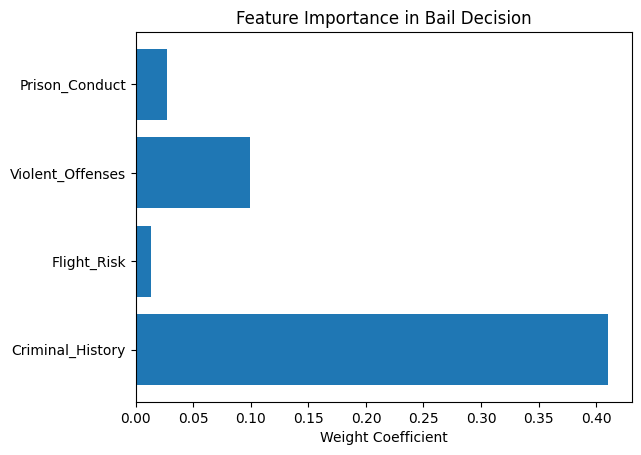

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
n_samples = 1000

# Features
criminal_history = np.random.randint(0, 10, n_samples)  # 0 to 9 prior convictions
flight_risk = np.random.uniform(0, 1, n_samples)  # 0 (low risk) to 1 (high risk)
violent_offenses = np.random.randint(0, 5, n_samples)  # 0 to 4 violent offenses
prison_conduct = np.random.uniform(0, 1, n_samples)  # 0 (good) to 1 (bad)

# Outcome: Bail granted (1) or denied (0)
bail_granted = (0.3 * criminal_history + 0.25 * flight_risk + 0.2 * violent_offenses + 0.25 * prison_conduct > 2).astype(int)

# Create DataFrame
df = pd.DataFrame({
    'Criminal_History': criminal_history,
    'Flight_Risk': flight_risk,
    'Violent_Offenses': violent_offenses,
    'Prison_Conduct': prison_conduct,
    'Bail_Granted': bail_granted
})

# Split data into train and test sets
X = df[['Criminal_History', 'Flight_Risk', 'Violent_Offenses', 'Prison_Conduct']]
y = df['Bail_Granted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Get coefficients (weights)
weights = dict(zip(X.columns, model.coef_))
print("Feature Weights (learned dynamically):", weights)

# Plot feature importance
plt.barh(list(weights.keys()), list(weights.values()))
plt.xlabel("Weight Coefficient")
plt.title("Feature Importance in Bail Decision")
plt.show()
